<a href="https://colab.research.google.com/github/Nikniknikm/Laboration_1/blob/master/Kopia_av_Inl%C3%A4mning_Laboration3_del2_klassificering_VT21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 3 del 2 klassificiering

## Klassificering

I denna andra del ska ni testa att klassificera ett annat dataset med hjälp av två olika modeller för klassificering, logistiskt regression och desicion trees (som klarar såväl regression som klassificering). Vi kommer använda ett dataset som har data om överlevare från Titanic.

Det dataset vi ska använda finns i datamappen på GitHub och heter Titanic. Några av de bibliotek ni behöver för att komma igång är också importerade i nedan kod. 

Den del av laboration som handlar om decision trees är inspirerad av David Johnsson på Uppsala universitet.


### Logistisk regression för att bestämma om man överlever eller inte

De frågor som ska besvaras är märkta med **Q** medan coduppgifter är märkta med **C**.

I vissa fall finns flera delfrågor som kan innehålla både rena koduppgifter, frågor eller en kombination, dessa är märkta **QC**. Delfrågorna Dessa är i en lista med en bokstav framför, ex. a. Huruvida en deluppgift ska kodas eller enbart besvaras avgörs av er baserat på själva texten. När ni arbetar med uppgiften förväntas ni själva avgöra hur många kodblock som krävs för att kunna utföra uppgiften samt göra den tydlig och lätt att förstå. Samma sak gäller när ni kommenterar och besvarar frågor, skriv kortfattat men tydligt. **(OBS! Vissa uppgifter kräver flera kodblock, då behöver ni skapa dem!)**

**Exempel:**

**QC** Undersök hur många som levde och hur många som dog.

>a. Antal som överlevde och antal som dog?
>
>b. Hur många % överlevde?
>
>c. Visualisera antal överlevare och antal döda i ett stapeldiagram

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

**C** Läs in datafilen och gör dig familiär med den. 

In [130]:
# Datafile

titanic_data = pd.read_csv("titanic-train.csv")
# Display the data in the notebook
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Q** Nedan är en översikt över några kolumner - fyll i vad varje kolumn står för där information saknas

- `survival` - # Om personen har överlevt eller ej, antar att 0 = ej och 1= ja
- `pclass` -  # Passagerar klass 
- `sex` - # Kön
- `age`- # Ålder
- `sibsp` - # av syskon/äkta hälft ombord 
- `parch` - # av föräldrar/barn ombord 
- `ticket` - #Biljett ID-nummer
- `fare` - #Biljett pris 
- `cabin` - #Kabin/ hytt nr
- `embarked` - Hamn där man steg ombord (C = Cherbourg, Q = Queenstown, S = Southampton)

**Q** Hur många passagerare fanns på Titanic enligt ert dataset?

In [11]:
titanic_data['PassengerId'].count()

#SVAR: 891 passagerare

891

### Explorativ dataanalys

För att veta vilka data som har betydelse när det handlar om att klassificera huruvida en person lever eller dör behöver vi undersöka vårt dataset med fokus på vilka variabler som påverkar `survival` som är den beroende variabel vi vill prediktera, allts vårt y. Först behöver vi dock städa och förbereda data för analys.

**QC** Undersök hur många som levde och hur många som dog.

>a. Antal som överlevde och antal som dog?
>
>b. Hur många % överlevde?
>
>c. Visualisera antal överlevare och antal döda i ett stapeldiagram

In [26]:
#Antal överlevare vs antal döda

titanic_data['Survived'].value_counts()

#SVAR: 549 personer dog och 342 personer överlevde

0    549
1    342
Name: Survived, dtype: int64

In [28]:
#Hur många procent överlevde

percent = titanic_data['Survived'].value_counts(normalize=True)
percent

#SVAR: 0.383838 överlevde

0    0.616162
1    0.383838
Name: Survived, dtype: float64

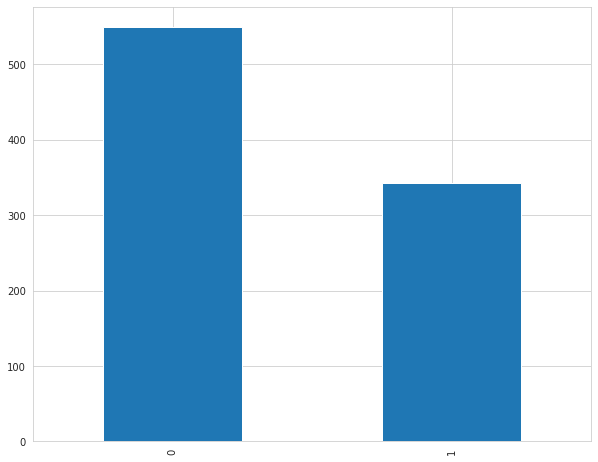

In [29]:
#Visualisera antal överlevare vs antal döda

titanic_data['Survived'].value_counts().plot.bar()

**QC** Städa ert data, hantera nullvärden, kontrollera outliers, typ av variabler (kategoriska, kontinuerliga, numeriska/labels)

>
>a. Vilka kolumner har nullvärden?
>
>b. Hur kan dessa hanteras? 
>
>c.Vilken typ av nullvärden har ni (MCAR/MAR/NMAR)?
>
>d. Vilka risker finns med ert sätt att hantera nullvärden? Varför? 
>
>e.Finns det outliers? Behöver de hanteras?
>
>f.Vilka variabler är kategoriska och vilka är kontinuerliga?
>


In [40]:
#Null värde

titanic_data.isnull().sum()

#SVAR: Följane kolumner: age, cabin och embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Hantering av null-värde

#SVAR: man kan ersätta de med 0 eller medianvärde

In [ ]:
#Vilken typ av null värde

#SVAR: MCAR: Missing completely at random -- MAR: Missing at random -- MNAR: Missing not at random
#Jag tror att age kolumnen kan vara MAR, CABIN: MCAR och Embarked:MAR

In [ ]:
#Risker

#SVAR:Tillexempel om vi erätter survived med 0 blir fel i hantering av datat
# då 0 betyder egentligen att de inte har överlevt.

In [ ]:
#Outliers

#SVAR:Ja det finns outliers. Tillexempel i agekolumnen.

In [ ]:
#Kategoriska vs kontinuerliga

#SVAR: Kategoriska är som Pclass och kön, 
#Kontinuerliga är som ticket, Fare och cabin


I följande uppgifter ska ni testa två olika varianter för att ersätta null och jämföra dessa med varandra samt välja den bästa för ert syfte. 

**C** Ersätt null med medianåldern
**OBS!** Kom ihåg att du måste spara dina ändringar i en ny dataframe, det går inte att ta bort null två gånger ur samma dataframe. 


In [49]:
#Ersätt ålder med medianåldern

titanic_passenger_fill_null_median = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_passenger_fill_null_median

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**CQ** Ersätt null med lämpliga värden baserat på andra variabler i ert dataset.

>a. För att beräkna korrelationen mellan olika variabler i ett dataset kan vi använda pandas inbyggda `corr()`. I nedan kodcell kontrolleras samtliga variabler gentemot varandra.
>
>b. Varför är det 1.00000 i flera rader?
>
>c. Vilka kolumner har någon korrelation med varandra? 
>HINT! En rule of thumb kan sägas vara att varaibler är svagt korrelerande om korrelationskoefficienten (r) är mellan 0,2-0,39, medelkorrelerade >mellan 0,4-0,59, och starkt korrelerade mellan 0,6-0,79, över 0,8 är mycket stark korrelation och 1 är helt beroende variabler. 
>
>d.Den starkaste korrelationen finns mellan ålder och klass. Vilken typ av korrelation är det (negativ eller positiv) och hur stark?
>
>e.I cellen under korrelationsberäkningen görs en visualisering av ålder i relation till klass. Vad säger den?
>
>f.Ersätt nullvärdena i age baserat på vad du kom fram till i fråga e. 
>
>

In [48]:
#Ersätt med relevant ålder beroende på korrelerad variabel
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
#corr 1.000000 

#SVAR: Eftersom korrelationen för en variabel med sig själv blir 1.

In [ ]:
#Svag Korrelation är mellan 0,2-0,39, 
#medelkorrelerade mellan 0,4-0,59,
#och starkt korrelerade mellan 0,6-0,79, 
#över 0,8 är mycket stark korrelation och
# 1 är helt beroende variabler

#SVAR: Svag korrelation: Survived och Fare, Parch och Fare, Fare och Survived 
#Medel korrelation: SibSp och Parch, Parch och SibSp


In [ ]:
#Age vs class

#SVAR: Det är negativt korrelation vilken är även negativt medel korrelation. 

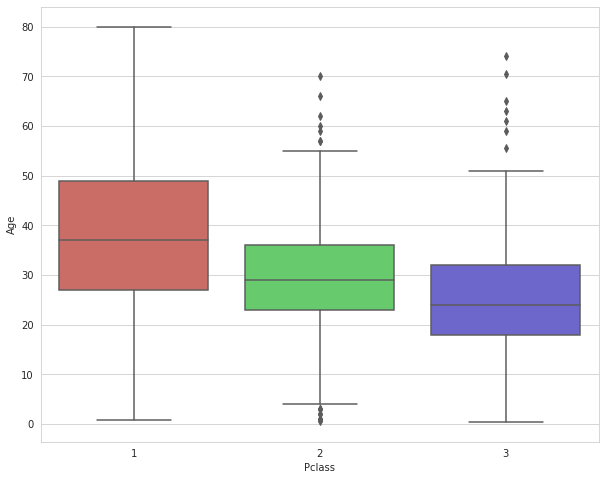

In [90]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

In [ ]:
#Visualisering

#Visualiseringen visar hur ålder och class förhåller sig till varandra.
#Visualiseringen visar att median ålder skijler sig utifrån vilken klass man har.
#klass 1 är för de äldre, class 2 är medelålder och class 3 är för de yngre.
#Det visar även att det finns outliers.

In [131]:
titanic_passenger_fill_null_class3_median = titanic_data.loc[titanic_data['Pclass'] == 3, ['Age']].median()
titanic_passenger_fill_null_class2_median = titanic_data.loc[titanic_data['Pclass'] == 2, ['Age']].median()
titanic_passenger_fill_null_class1_median = titanic_data.loc[titanic_data['Pclass'] == 1, ['Age']].median()

def age_replace(cols):
  Age = cols[0]
  Pclass = cols[1]

  if titanic_data['Age'].isnull:
    if Pclass == 1:
      return titanic_passenger_fill_null_class1_median
    elif Pclass == 2:
      return titanic_passenger_fill_null_class2_median
    elif Pclass == 3:
      return titanic_passenger_fill_null_class3_median
  

In [132]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_replace, axis = 1)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37.0,0,0,111369,30.0000,C148,C


**Q** Vilket sätt är att föredra?
(HINT! kontrollera de vanliga mätvärdena du får med `.describe()` för ert dataset innan och efter ni ersätter nullvärden, dessa bör vara ungefär samma före som efter ex. median/medel/max/min)

In [ ]:
#SVAR: Ibland är det bra att fylla nullvärde med median till exempel för ålder, 
#men detta kan vara helt fel och försämra kvalitet på vårt data.
#Därför beroende på vad är för typ av data får man analysera och se är det bättre
#Med att ersätta med 0 eller med median,max,min,medel.


**QC** Det finns en till kolumn med nullvärden 

>a.Vad är lämpligt att göra med den?
>
>b.Gör det :)

In [133]:
#Kolumn med null

#SVAR: Kabin kolumn

titanic_data['Cabin'] = titanic_data['Cabin'].fillna(0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,0,S


**QC** Analys av varaibler

Nu har vi städat vårt dataset är det dags att förbereda det för analys. 

>a. Vilka variabler är överhuvudtaget inte intressanta för huruvida man lever eller dör? Kontrollera i vår korrelationsanalys.(OBS! Alla kolumner finns inte med eftersom det inte går att beräkna korrelation på vissa)
>
>b.När vi använder logistisk regression vill vi inte att de oberoende variablerna ska vara för korrelerade (beroende) av varandra. Det påverkar resultatet negativt. Därför tittar vi igen på vår korrelationsanalys. För att vi ska tycka korrelationen är för stark bör gränsvärdet ligga runt 0,4, rensa bland era variabler så att det inte finns några oberoende variabler som har en korrelation starkare än 0,4 till någon av de andra oberoende variablerna.
>


In [112]:
#a)Inte intressanta variabler 

titanic_data.corr()

#SVAR: Jag anser att passengerId, SibSP, Parch är inte intressanta 
#men däremot Pclass, Age och Fare är de som är intressanta och har en högre korrelation nivå.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035686,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.333016,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.993769,0.083081,0.018443,-0.549500
Age,0.035686,0.333016,-0.993769,1.000000,-0.077993,-0.018639,0.571282
SibSp,-0.057527,-0.035322,0.083081,-0.077993,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.018639,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.571282,0.159651,0.216225,1.000000


In [135]:
#b)Korrelation analys 

titanic_data.drop(['Name','PassengerId','Ticket','Fare', 'Pclass','SibSp','Parch','Embarked'], inplace =True, axis= 1)


In [136]:
titanic_data

,Survived,Sex,Age,Cabin
0,0,male,24.0,0
1,1,female,37.0,C85
2,1,female,24.0,0
3,1,female,37.0,C123
4,0,male,24.0,0
...,...,...,...,...
886,0,male,29.0,0
887,1,female,37.0,B42
888,0,female,24.0,0
889,1,male,37.0,C148


**QC** Se till att variablerna går att applicera i vald modell.

Eftersom vi ska använda logistisk regression måste alla värden vara numeriska, vi behöver alltså ändra våra kategoriska, icke-numeriska variabler till numeriska. Detta görs lämpligen genom ungefär följande kod: `dataframe_without_kategorial_sex = pd.get_dummies(*namnet på ddataframen*, columns=['Sex'], drop_first=True)`

>
>a. Varför ersätter vi med 0 och 1 istället för 0,1,2,3?
>
>b. Ersätt övriga kategoriska kolumner med dummyvariabler. 
>
>

In [137]:
dataframe_without_kategorial_sex = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)
dataframe_without_kategorial_sex.head()

,Survived,Age,Cabin,Sex_male
0,0,24.0,0,1
1,1,37.0,C85,0
2,1,24.0,0,0
3,1,37.0,C123,0
4,0,24.0,0,1


In [ ]:
#a) ersätta med 0 och 1

#SVAR: Det blir bättre kvalite på vår data när vi ersätter med bara två värde, 1 och 0.
#Om vi ersätter med flera värde kan det bli svårt för en annan person att fatta vad som
#menas med de olika värde

In [ ]:
#9b: Gör samma sak för övriga kategoriska variabler

#SVAR: Eftersom jag har tagit bort en del kolumner så finns det inga kategoriska variabler kvar för att ersätta

**QC** Skapa modell, träna och testa (här behöver ni själva skapa ett antal kodblock för de olika deluppgifterna.)

(OBS! Se till att ni döper era variabler till X-train, X_test,y_train,y_test annars fungerar inte utvärderingskoden)

>
>a. Starta med att formatera data så att du skapar X och y där y är den beroende variabeln survival och X är samtliga beroende variabler (de som ni bestämt er för att ha kvar i ert dataset)
>
>b. Dela i träning (80%) och test (20%)
>
>c. Har vi tillräckligt med data för att kunna träna vår modell eller måste vi ta bort fler kolumner? HINT! en rule of thumb säger minst 50 rader per oberoende variabel.
>
>d.Skapa och träna modell (kod finns för starten)
>
>e.Testa modell på träningsdata
>
>f. Vad är sannolikheten för att en kvinna, ålder 34, med två barn som reser i 2:a klass med sin man överlever? 
>


In [ ]:
#Startkod för uppgift d) skapa och träna modell
LogReg = LogisticRegression() 

**QC** Utvärdera modell

I nedanstående kodblock utvärderas klassificeringsmodellen på några olika sätt. 

>
>a. Vilka sätt att utvärdera en klassificeringsmodell är kodade nedan?
>
>b. För varje utvärderingsmetod som är kodad (Confusion matrix  och Classification report), vad säger de om den klassificerare ni tränat? 
>
>c. Vad är er bedömning av er klassificerare (bra/dålig) vad baserar ni detta på och varför?
>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

### Desicion trees för att bestämma vilka som överlever

Vi ska också testa att använda ett beslutsträd för att bestämma vilka som överlever. Koden för detta är redan given nedan. Dock ska ni besvara några frågor kring beslutsträd och jämföra resultatet mellan de två klassificerarna. 

**QC** Följande frågor ska besvaras, vissa kan kräva att ni skriver kod. Ni ska också (kortfattat) kommentera koden så att det framgår vad som görs.

>
>a. Vilka oberoende variabler (features) används i beslutsträdet för att avgöra vem som överlever?
>
>b.Hur många män respektive kvinnor överlever i prediktionen om du testar att prediktera med endast de 10 första raderna som sample (OBS! Kräver kod)
>
>c. Hur många felaktiga respektive korrekta prediktioner gör beslutsträdet i jämförelse med den logistiska regressionen?
>
>d. Vilken av algoritmerna är "bäst? för uppgiften?
>
>e. Vilka svagheter respektive styrkor har de båda modellerna i jämförelse med varandra?
>
>f.Hur har beslutsträdet "tänkt" för att komma fram till modellen?
>


In [ ]:
from graphviz import Source 
from sklearn.tree import export_graphviz 
from sklearn import tree


In [ ]:
survived_data = titantic_passengers.survived #detta motsvarar y
titantic_passengers = titantic_passengers[['sex_male', 'fare', 'age', 'sibsp']] #motsvarar X
titantic_passengers.info()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titantic_passengers, survived_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train.values, y_train.values)

In [ ]:
y_pred = classifier.predict(X_test.values)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test.values, y_pred)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Dead', 'Alive'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot

*Lämna in länk till kod i colaboratory eller till GitHub repositoriet (med koden exekverad) för rättning.*